# Linear Regression

### 선형회귀 알고리즘
* Regression toward the mean(Francis Galton, 1822~1911)
* 샘플 데이타를 가장 잘 대표하는 직선의 방정식
    * $y = ax + b$
    * $a$ : 기울기
    * $b$ : 절편
* Hypothesis
    * $H(x) = W_x + b$
        * $H(x)$ : Hypothtesis
        * $W$ : Weight
        * $b$ : bias
 
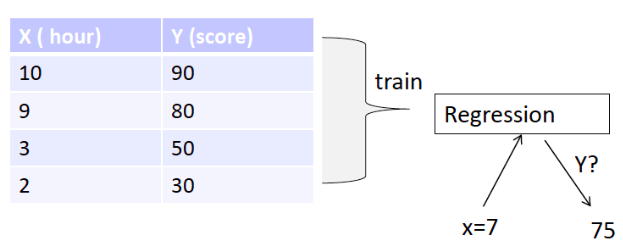	

### Linear Regression 개념 정리
* Linear Regression을 Numpy 만으로 구현해 본다.
* 단순화 하기 위해서 계수 1개만으로 제한 한다.


### 샘플 데이타 생성
* m개의 샘플 데이타를 만든다.
* X 데이타 : np.arange(m) 
    * 0 ~ m
* y 데이타 : X * 2

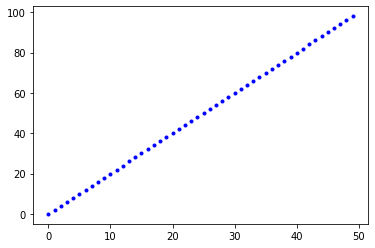

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 

plt.plot(X, y, 'b.')

#### 노이즈 추가
* 데이타가 너무 정직해서 약간의 노이즈를 추가

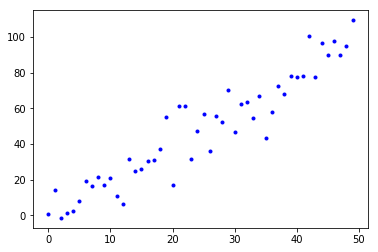

In [3]:
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')

#### 선형 회귀 표시
* 데이타의 선회 회귀를 직선으로 표시
* 최종적으로 이 선을 만족하는 W를 찾으면 성공

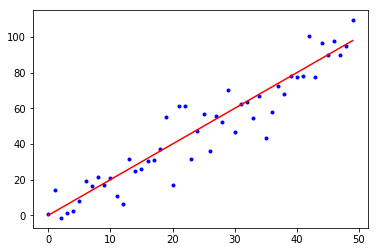

In [4]:
plt.plot(X, y, 'b.')
plt.plot(X, X*2, 'r')

### Hypothesis와 Cost함수
* Hypothesis(가설)
    * $H(W) = Wx^{(i)}$
* Cost함수는 MSE(Mean Square Error, 평균 제곱 오차법)를 사용한다.
    * $\text{cost}(W) = \frac{1}{m}\displaystyle\sum_{i=1}^m(H(x^{(i)}) - y^{(i)})^2$
* W 값을 0.1 ~ 4.0까지 0.1씩 증가 하면서 cost를 구해서 시각화한다.
    * $W$의 변화에 따라 Cost의 변화량을 시각화해 보면 MSE 함수는 Convex 함수임을 알 수 있다.


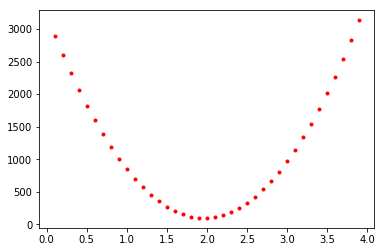

In [5]:
w_range = np.arange(0.1, 4, 0.1) 
costs = np.array([])
for i, w in enumerate(w_range):
    h = w*X
    cost = 1/m * np.sum( (h - y)**2)
    costs = np.append(costs, cost)
    #plt.plot(w, cost, 'r.')
plt.plot(w_range, costs, 'r.')

### Cost 함수와 Gradient

* Cost 함수가 Convex 함수이기 때문에 최소값을 찾으려면 기울기를 따라 내려가면 된다.
* 미분을 하면 기울기를 얻을 수 있다.
    * $\displaystyle\frac{\partial}{\partial W}cost(W) = \frac{2}{m}\sum_{i=1}^m(H(W) -y^{(i)})x^{(i)}$
* 미분한 결과를 Cost 함수의 변화에 시각화하면 다음과 같다.
* 미분한 결과를 일정한 값(learning_rate)의 비율로 W에서 빼는 것을 반복하다 보면 cost가 가장 작은 W를 찾을 수 있다


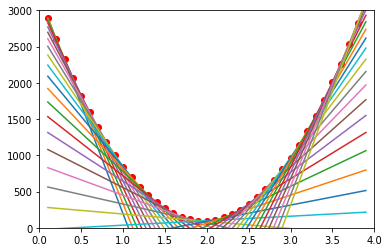

In [6]:
import time
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    h = w*X
    gradient =  2/m * np.sum( (h-y) * X)
    #plt.plot(w_range, gradient *w_range + cost)
    plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
    plt.axis([0, 4, 0, 3000])


### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

initial W 0.5197372651901055
epoch: 0  cost: 1778.2020382812066  gradient: -2331.8106169191296  W: 0.636327796036062
epoch: 20  cost: 154.5871399798544  gradient: -431.9376946623197  W: 1.7162710220671982
epoch: 40  cost: 98.87643051680631  gradient: -80.01085967980654  W: 1.916316507765514
epoch: 60  cost: 96.96484227496192  gradient: -14.82097475124634  W: 1.9533723412423762
epoch: 80  cost: 96.89925040507593  gradient: -2.7453934810363716  W: 1.9602364541208632
epoch: 100  cost: 96.89699976694114  gradient: -0.5085485598768265  W: 1.9615079420672354
epoch: 120  cost: 96.89692254133337  gradient: -0.09420202952266664  W: 1.961743468729805
epoch: 140  cost: 96.89691989150958  gradient: -0.017449705035437548  W: 1.961787096991433
epoch: 160  cost: 96.8969198005868  gradient: -0.0032323316956126293  W: 1.9617951785614425
epoch: 180  cost: 96.896919797467  gradient: -0.0005987475534084297  W: 1.961796675567543
suspended: 200
Final W: 1.96179694732301


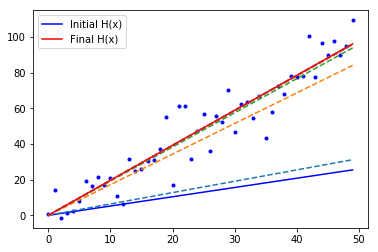

In [7]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

learning_rate = 0.00005
suspend = 0.00001
old_g = None
epochs = 1000
for epoch in range(epochs):
    hypothesis = W * X 
    loss = hypothesis - y
    cost = 1/m * np.sum(loss**2)
    gradient =  2/m * np.sum(loss * X)
    if old_g is not None and abs(gradient - old_g) < suspend:
        print('suspended:', epoch)
        break
    old_g = gradient
    W = W - learning_rate * gradient
    if epoch %20 == 0:
        print('epoch:',epoch,' cost:',cost,' gradient:',gradient, ' W:', W)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()


### Stochastic Gradient Descent
* 모든 샘플에 대해서 비용을 계산하면 샘플수가 많을 수록 계산 속도가 오래 걸린다.
* 각 샘플 중에 랜덤하게 한개만 선택해서 Gradient를 계산해서 속도를 개선한다.
* 단점은 선택한 샘플에 따라 수렴율이 일정하지 않아서 최적치를 찾지 못할 수 있다.
    * 학습률을 처음에는 크게 했다가 점진적으로 감소시켜야 한다.
    * 매 반복에서 학습률을 결정하는 함수를 학습 스케쥴(learning schedule)이라고 한다.

In [ ]:
learning_rate = 0.1
w_range = np.arange(0, 4, learning_rate)
for i, w in enumerate(w_range):
    random_i = np.random.randint(m)
    xi = X[random_i]
    yi = y[random_i]
    h = w*xi
    sgd_cost = (h - yi)**2
    plt.plot(w, sgd_cost, 'ro')
    sgd_gradient =  2 *(h-yi) * xi
    plt.plot(w_range, sgd_gradient*(w_range-w) +sgd_cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
    plt.axis([0, 4, -100, 3000])

initial W 0.03241786254635892
epoch: 0 cost: 1.310875416348226e+34  gradient: 6.869608066588379e+18  W: -7826954576809734.0 learn_rate: 0.001694915254237288
epoch: 5 cost: 0.6614113956773859  gradient: -0.0  W: -7.576967411369395e+66 learn_rate: 0.0011904761904761906
epoch: 10 cost: 4.891977909857655e+166  gradient: 1.6809540269542714e+85  W: -9.601118644894978e+81 learn_rate: 0.0009174311926605505
epoch: 15 cost: 6.764288582758673e+119  gradient: -5.263698892886971e+61  W: 1.3579680271119898e+58 learn_rate: 0.0007462686567164179
epoch: 20 cost: 5.773790449057577e+69  gradient: -6.078836967214082e+35  W: -1.8614048732153183e+34 learn_rate: 0.0006289308176100629
epoch: 25 cost: 0.04188891645997836  gradient: -17.601432502441384  W: 1.8107365984889887 learn_rate: 0.0005434782608695652
epoch: 30 cost: 0.9069449149600112  gradient: -28.570096665289917  W: 1.6947134125768928 learn_rate: 0.0004784688995215311
epoch: 35 cost: 59.49347345727077  gradient: -632.4825021506039  W: 1.9863508330182

[0, 50, 0, 100]

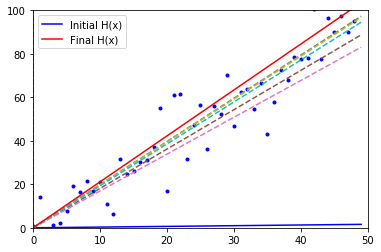

In [8]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
for epoch in range(epochs):
    for i in range(m):
        random_i = np.random.randint(m)
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = (h-yi)**2
        gradient = 2*(h-yi) * xi
        learning_rate = t0/(t1 + (epoch * m + i*10))
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

### Mini-Batch Gradient Descent
* Batch GD와 Stochastic GD를 혼합한 형태
* 임의의 작은 샘플 셋트에 대해서 그레이디언트를 계산
* SGD에 비해 덜 불규칙하고 더 정확한 최소값에 도달
* 지역 최소값에 빠질 가능성 높음(Convex 함수가 아닌경우)


initial W 0.7973164617770505
epoch: 0 cost: 5.282733523421844e+23  gradient: 40893790777750.336  W: -383101547668.2467 learn_rate: 0.01
epoch: 5 cost: 2.2911897071118733e+71  gradient: -2.2443153637835174e+37  W: 7.636225855668082e+33 learn_rate: 0.00125
epoch: 10 cost: 5.221269191257828e+58  gradient: -1.4409699275069596e+31  W: 2.35958463285187e+27 learn_rate: 0.0006666666666666666
epoch: 15 cost: 87804776979450.06  gradient: -532582905.803601  W: -87646.63849633466 learn_rate: 0.00045454545454545455
epoch: 20 cost: 80.85141866779436  gradient: -362.98145809908726  W: 1.9858003469961616 learn_rate: 0.0003448275862068965
epoch: 25 cost: 20.876541636370607  gradient: -122.6472967480333  W: 1.864666130635377 learn_rate: 0.0002777777777777778
epoch: 30 cost: 131.17124984855732  gradient: -101.68288547728824  W: 1.8627024853043952 learn_rate: 0.00023255813953488373
epoch: 35 cost: 203.3360283140272  gradient: 511.3080510845376  W: 1.8523564951457718 learn_rate: 0.0002
epoch: 40 cost: 79.3

[0, 50, 0, 100]

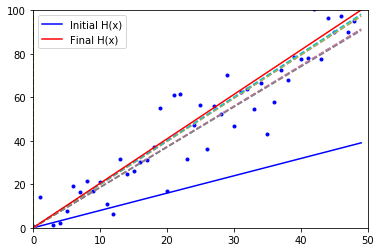

In [9]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
batches = 5
for epoch in range(epochs):
    for i in range(int(m/batches)):
        random_i = np.random.randint(0,m, (batches,))
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = 1/batches* np.sum((h-yi)**2)
        gradient = 2/batches* np.sum((h-yi) * xi)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

###  Scikit-learn 구현
* `sklearn.linear_model.LinearRegression`
    * W : `model.coef_`
    * b : `model.intercept_`

W: [[1.99144584]] b: [-0.97841119]


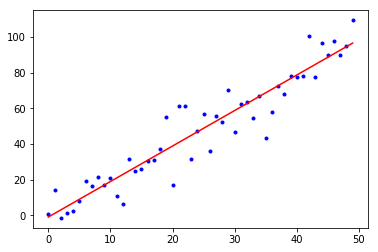

In [10]:
from sklearn.linear_model import LinearRegression

plt.plot(X, y, 'b.')

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))
W = lr.coef_
b = lr.intercept_
print('W:', W, 'b:', b)
plt.plot(X, W.ravel()*X + b, 'r-')